In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-5, 5, 100)
rng = np.random.RandomState(21)
y = 4*np.sin(2*x) + x + rng.uniform(0,4,size=len(x))

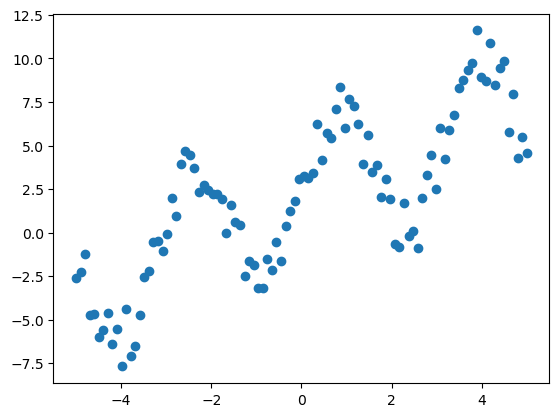

In [3]:
plt.plot(x, y, 'o');

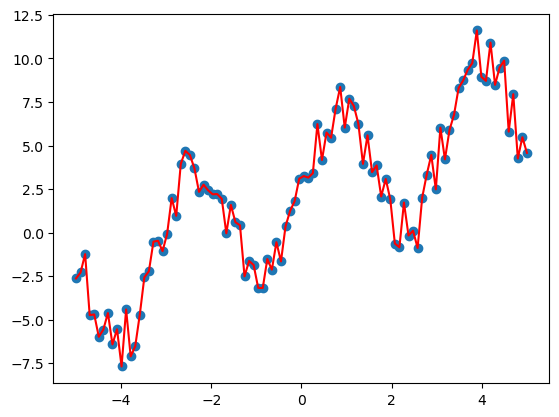

In [4]:
plt.plot(x, y, 'o');
plt.plot(x, y, color='r');

In [5]:
x.shape

(100,)

In [6]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
print('coefficients: ', regressor.coef_)
print('intercept: ', regressor.intercept_)

coefficients:  [1.18020542]
intercept:  1.9294103152271354


In [ ]:
# y = Weight * X + intercept

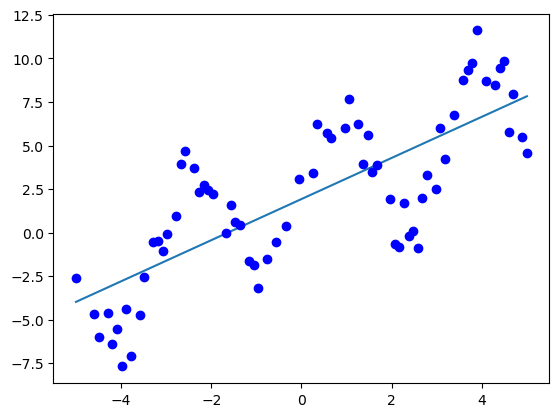

In [10]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
# min_pt = -5 * Weight + intercept
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_
# max_pt = +5 * Weight + intercept
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'bo');

In [11]:
# train set :
y_pred_train = regressor.predict(X_train)

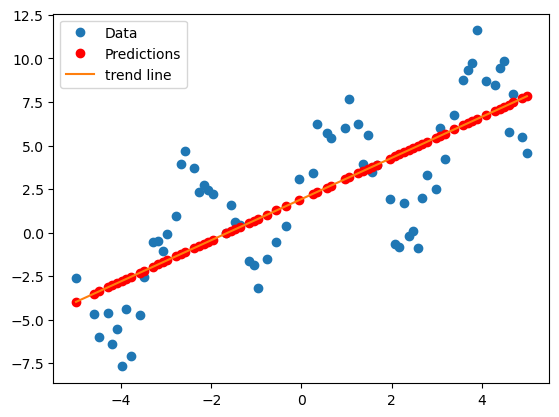

In [12]:
plt.plot(X_train, y_train, 'o', label="Data")
plt.plot(X_train, y_pred_train, 'ro', label="Predictions")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='trend line')
plt.legend(loc='best')

Scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method.
For regression tasks, this is the R<sup>2</sup> score. Another popular way would be the Mean Squared Error (MSE).
As its name implies, the MSE is simply the average squared difference over the predicted and actual target values

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

In [13]:
regressor.score(X_train, y_train)

0.5903325293023559

In [14]:
# test set :
y_pred_test = regressor.predict(X_test)

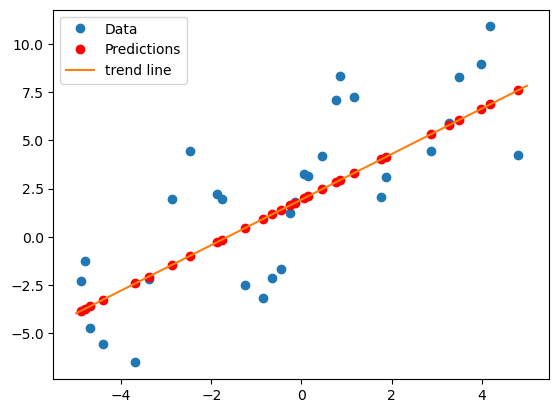

In [15]:
plt.plot(X_test, y_test, 'o', label="Data")
plt.plot(X_test, y_pred_test, 'ro', label="Predictions")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='trend line')
plt.legend(loc='best');

In [16]:
regressor.score(X_test, y_test)

0.5974669148342461

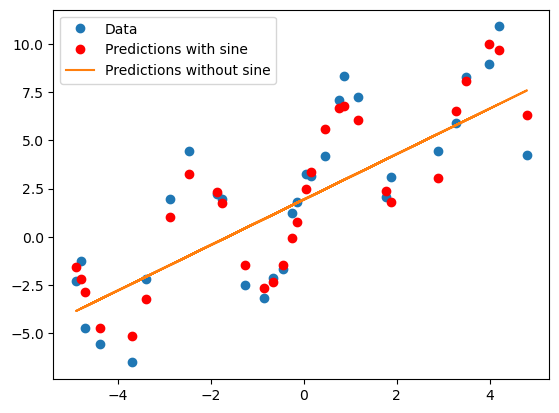

In [17]:
XX_train = np.concatenate((X_train, 4*np.sin(2*X_train)), axis=1)
XX_test = np.concatenate((X_test, 4*np.sin(2*X_test)), axis=1)
regressor.fit(XX_train, y_train)
y_pred_test_sine = regressor.predict(XX_test)

plt.plot(X_test, y_test, 'o', label="Data")
plt.plot(X_test, y_pred_test_sine, 'ro', label="Predictions with sine")
plt.plot(X_test, y_pred_test, label='Predictions without sine')
plt.legend(loc='best');

In [18]:
regressor.score(XX_train, y_train)

0.9411858647560122

In [19]:
regressor.score(XX_test, y_test)

0.9456851544929274